In [1]:
import pandas
import numpy as np 
from sklearn.metrics import classification_report

In [2]:
moje_data = pandas.read_csv('ds1.csv',sep=';')
moje_data.head()

,ID,Min_EKG,Max_EKG,Mean_EKG,STDEV_EKG,Min_GSR,Max_GSR,Mean_GSR,STDEV_GSR,Min_Tep,Max_Tep,Mean_Tep,STDEV_Tep,Label
0,3_h,10,617,333.516508,48.163003,317,337,330.212305,4.077739,37.15,38.61,37.894830,0.297241,Neutral
1,5_h,10,655,333.662258,74.671788,273,315,302.143985,9.844223,35.68,36.66,36.170000,0.042649,Negative
2,6_h,172,653,326.923148,33.356241,366,388,381.556474,4.600456,36.17,36.66,36.630415,0.116931,Negative
3,7_h,204,519,332.974105,28.862731,273,322,305.297337,10.751020,37.15,37.63,37.256868,0.200067,Neutral
4,8_h,225,562,356.487284,25.060835,376,418,397.679890,10.684603,37.63,38.12,37.722453,0.192077,Negative


In [3]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [4]:
X = moje_data.drop(['ID','Label'], axis=1)
y = moje_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [5]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [6]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


In [7]:
clf = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 3, min_samples_leaf = 10, max_depth= 10)
#clf = DecisionTreeClassifier()

In [8]:
%%time
clf = clf.fit(X_train_scaled,y_train,)

CPU times: user 912 µs, sys: 0 ns, total: 912 µs
Wall time: 1.08 ms


In [9]:
y_pred = clf.predict(X_test_scaled)

In [10]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [11]:
train_error = np.round(clf.score(X_train_scaled, y_train), 2)
test_error = np.round(clf.score(X_test_scaled, y_test), 2)
    
print("Presnosť tréningových dát = " + str(train_error))
print("Presnosť testovacích dát = " + str(test_error))

Presnosť tréningových dát = 0.57
Presnosť testovacích dát = 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


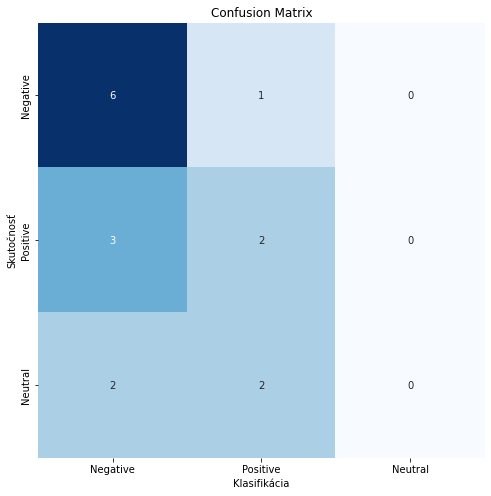

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.55      0.86      0.67         7
    Positive       0.40      0.40      0.40         5
     Neutral       0.00      0.00      0.00         4

    accuracy                           0.50        16
   macro avg       0.32      0.42      0.36        16
weighted avg       0.36      0.50      0.42        16



In [12]:
from sklearn.metrics import confusion_matrix,  classification_report
import seaborn as sns
import matplotlib.pyplot as plt
mapovanie = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
#y_pred = np.array(list(map(lambda x: np.argmax(x), clf.predict(X_test_scaled))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=mapovanie.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, mapovanie.keys())
plt.yticks(np.arange(3) + 0.5, mapovanie.keys())
plt.xlabel("Klasifikácia")
plt.ylabel("Skutočnosť")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)